<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Exercise_4_Both_Parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 of Exercise 4


#Import Libraries

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from collections import Counter
import seaborn as sns
from sklearn.tree import plot_tree

#Load the Dataset wine-missing


In [147]:
df= pd.read_csv('wine-missing.csv')
print(df.head())
df.describe()
print("")
unknown_count = (df['type'] == 'unknown').sum()
print("Original unknown samples:", unknown_count)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    white            7.0              0.27         0.36            20.7   
1  unknown            6.3              0.30         0.34             1.6   
2    white            8.1              0.28         0.40             6.9   
3  unknown            7.2              0.23         0.32             8.5   
4  unknown            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  

#Plot the Histogram of each Feature
To visulize the features, we will remove the type feature which contains many unknown values. So in total there will be 12 histograms and one bar plot.

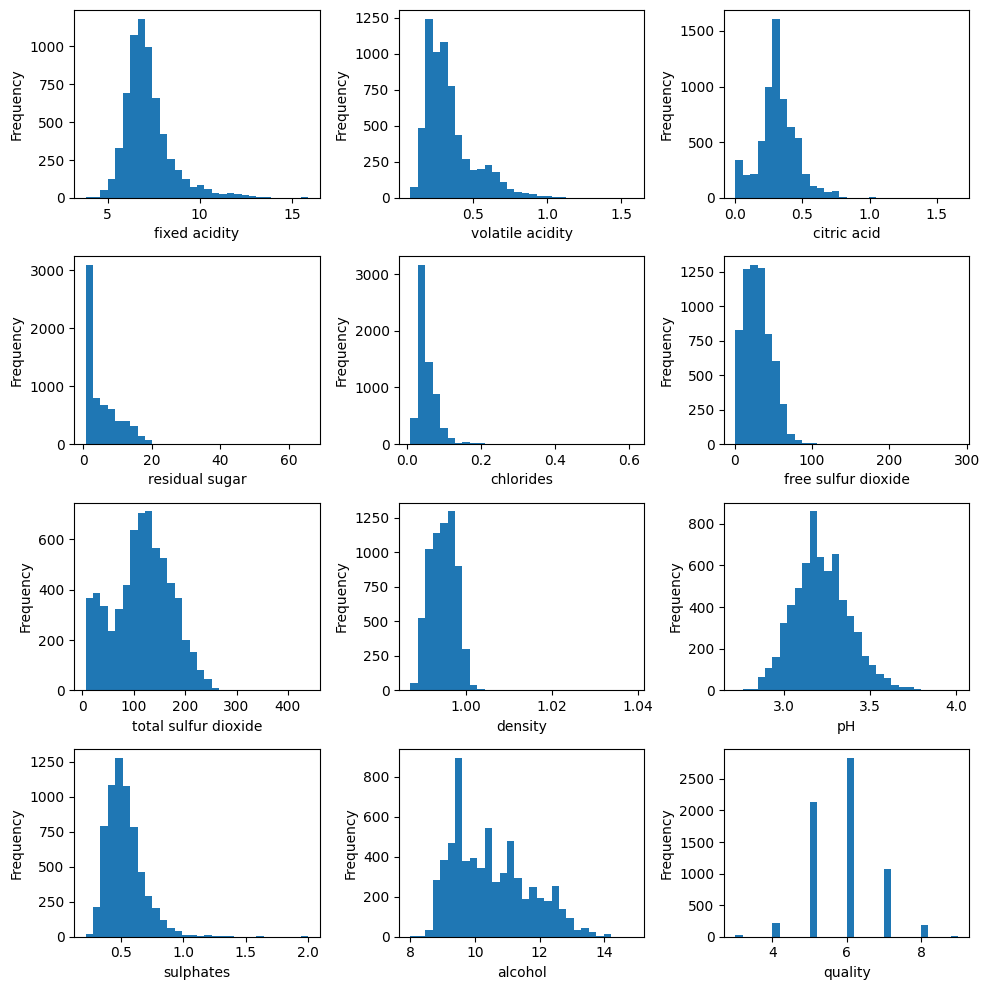

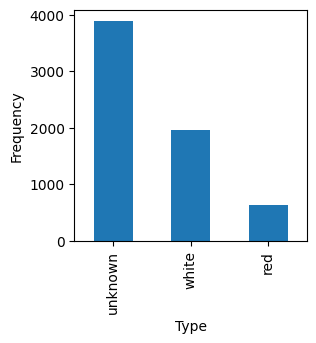

In [148]:
# Histogram of 12 features
plt.figure(figsize=(10,10))
cols=df.columns.drop(['type'])
for i, col in enumerate(cols):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col].dropna(), bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#Bar plot of type
plt.figure(figsize=(3,3))
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()




# Task - 2

# Replace the strs with numbers, white -> 0 , red ->1, unknown ->2

/tmp/ipython-input-544065147.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type']=df['type'].replace('unknown',2)


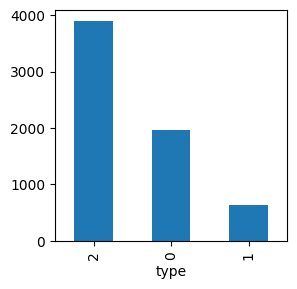

In [149]:
# Replacement
df['type']=df['type'].replace('white', 0)
df['type']=df['type'].replace('red', 1)
df['type']=df['type'].replace('unknown',2)
# Split the dataframe to X, y
X=df.drop('type', axis=1)
y=df['type']
plt.figure(figsize=(3,3))
y.value_counts().plot(kind='bar')
plt.show()

# Conver X,y to numpy arrays
X=np.array(X)
y=np.array(y)


#Task 3
#Create two Datasets, one (X_known, y_known), and (X_unknown,y_unknown)

In [150]:
# Mask the known/unknow, using the previous encoding.
mask_known=df['type']!=2
mask_unknown=df['type']==2

# Split the data to Known & Unknown
X_known=X[mask_known]
y_known=y[mask_known]

# Define only the X_unknown
# There is no reason to define the y_unknown,
#Because all the values are the same 2, and we will try to predict the unknown labels.
X_unknown= X[mask_unknown]

print(f'Shape of X: {X.shape}')
print(f'Shape of X_known: {X_known.shape}')
print(f'Shape of X_unknown: {X_unknown.shape}')


Shape of X: (6497, 12)
Shape of X_known: (2599, 12)
Shape of X_unknown: (3898, 12)


#Task 4
for the known dataset, split the data to train-test -> 70-30 respectively. Define random_seed=43 & stratify=True

In [151]:
# the stratify parameter must be applied to y_known, in order to create the X_train,X_test equally.
seed=42
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.3, random_state=seed, stratify=y_known)

print(f"The length of the X_train is: {len(X_train)}")
print(f"The length of the X_test is: {len(X_test)}")
print(  f"The length of the y_train is: {len(y_train)}")
print(f"The length of the y_test is: {len(y_test)}")

The length of the X_train is: 1819
The length of the X_test is: 780
The length of the y_train is: 1819
The length of the y_test is: 780


# Task 5

Train a classifier -Random Forest with seed=42, and calculate the accuracy, f1-score, precision and recall in both train and test sets.

In [152]:
# Define the Classifier
seed=42
classifier= RandomForestClassifier(random_state=seed)
# Fit the classifier to data
classifier.fit(X_train, y_train)

# Predict the accuracy in the Train set
y_pred_train = classifier.predict(X_train)
train_accuracy= accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_precision= precision_score(y_train, y_pred_train)
train_recall= recall_score(y_train, y_pred_train)

# Predict the accuracy in the Test set
y_pred_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1= f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall= recall_score(y_test, y_pred_test)

# Print the results
print(f"The train accuracy is: {train_accuracy*100:.2f}%")
print(f"The train f1 score is: {train_f1*100:.2f}%")
print(f"The train precision is: {train_precision*100:.2f}%")
print(f"The train recall is: {train_recall*100:.2f}%")
print(f"The test accuracy is: {test_accuracy*100:.2f}%")
print(f"The test f1 score is: {test_f1*100:.2f}%")
print(f"The test precision is: {test_precision*100:.2f}%")
print(f"The test recall is: {test_recall*100:.2f}%")
print("------------\n")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


# Print the majority of White and red wines in Train set.
print("y_train distribution:", Counter(y_train))
print("y_test distribution:", Counter(y_test))


The train accuracy is: 99.95%
The train f1 score is: 99.89%
The train precision is: 99.78%
The train recall is: 100.00%
The test accuracy is: 99.87%
The test f1 score is: 99.74%
The test precision is: 99.48%
The test recall is: 100.00%
------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       0.99      1.00      1.00       192

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

[[587   1]
 [  0 192]]
y_train distribution: Counter({np.int64(0): 1371, np.int64(1): 448})
y_test distribution: Counter({np.int64(0): 588, np.int64(1): 192})


Above we can see the main metrics of the classification, which the classifier achieved extra-ordinary results. The most appropriate metric is the F1-score, becasue the dataset is imbalanced. Therefore, accuracy metric could be misleading the developer or the end-user, because we have 2 classes but the majority of samples belongs to **class 0: white wine**.

Another reason that the Random Forest achieved these results, was the difference in the other attributes. The red wines are very separable from the white wines, because they have much higher sulfur dioxide and lowe color intensity. Additionally, they have higher clorides and sulphates, which our classifier can pick up these differences extremely easily.

# Task 6
Train a new RandomForest using the Balance parameter

This parameter automaticcaly adjust teh weight of each class inversely proportional to its frequency in the training data. Eventually the white samples will get smaller weights than the red samples, which are less during the training of the classifier.

In [153]:
# Define the Classifier
seed=42
model= RandomForestClassifier(random_state=seed, class_weight='balanced')
# Fit the classifier to data
model.fit(X_train, y_train)

# Predict the accuracy in the Train set
y_pred_train = model.predict(X_train)
train_accuracy= accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_precision= precision_score(y_train, y_pred_train)
train_recall= recall_score(y_train, y_pred_train)

# Predict the accuracy in the Test set
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1= f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall= recall_score(y_test, y_pred_test)

# Print the results
print(f"The train accuracy is: {train_accuracy*100:.2f}%")
print(f"The train f1 score is: {train_f1*100:.2f}%")
print(f"The train precision is: {train_precision*100:.2f}%")
print(f"The train recall is: {train_recall*100:.2f}%")
print(f"The test accuracy is: {test_accuracy*100:.2f}%")
print(f"The test f1 score is: {test_f1*100:.2f}%")
print(f"The test precision is: {test_precision*100:.2f}%")
print(f"The test recall is: {test_recall*100:.2f}%")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix Below:")
print(confusion_matrix(y_test, y_pred_test))

# Print the majority of White and red wines in Train set.
print("y_train distribution:", Counter(y_train))
print("y_test distribution:", Counter(y_test))


The train accuracy is: 99.95%
The train f1 score is: 99.89%
The train precision is: 99.78%
The train recall is: 100.00%
The test accuracy is: 99.49%
The test f1 score is: 98.95%
The test precision is: 99.47%
The test recall is: 98.44%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       588
           1       0.99      0.98      0.99       192

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

Confusion Matrix Below:
[[587   1]
 [  3 189]]
y_train distribution: Counter({np.int64(0): 1371, np.int64(1): 448})
y_test distribution: Counter({np.int64(0): 588, np.int64(1): 192})


#Task 7
Use the classifier from task 6 to calculate the possibilities for the unknown samples. Below command calculate ths possibilites of the unknown samples to belong either in white or red wine.

In [154]:
y_unknown_proba=model.predict_proba(X_unknown)
print(y_unknown_proba)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]]


# Task 8
'red' if > y_unknow_proba>0.65 else white

In [155]:
# Create a list with the number of classes
idx_red = list(classifier.classes_).index(1)
#Possibility to be red
proba_red = y_unknown_proba[:, classifier.classes_ == 1][:, 0]
# Define the two thresholds.
mask_red = proba_red >0.65
mask_white = proba_red <0.35

# Keep the samples that agreed with the thresholds
X_unknown_red = X_unknown[mask_red]
X_unknown_white = X_unknown[mask_white]

# Determine the Labels based on this classification
y_unkonwn_red = np.ones(len(X_unknown_red))
y_unkonwn_white = np.zeros(len(X_unknown_white))

# Stack and Concat, Unify everything in two vectors.
X_unknown_new = np.vstack((X_unknown_red, X_unknown_white))
y_unknown_new = np.concatenate([y_unkonwn_red, y_unkonwn_white])

print(f"The length of the X_unknown_new is: {len(X_unknown_new)}")
print(f"The length of the y_unknown_new is: {len(y_unknown_new)}")

The length of the X_unknown_new is: 3847
The length of the y_unknown_new is: 3847


#Task 9 - Unify the X_unknown with the original X_train, as well for the labels.

In [156]:
X_train_aug = np.vstack((X_train, X_unknown_new))
y_train_aug = np.concatenate([y_train, y_unknown_new])

print("Original train size:", X_train.shape[0])
print("Augmented train size:", X_train_aug.shape[0])


seed=42
model_augmented= RandomForestClassifier(random_state=seed, class_weight='balanced')
model_augmented.fit(X_train_aug, y_train_aug)
#Calculate the accuracy in train/test sets
y_pred_train = model_augmented.predict(X_train)
train_accuracy_augmented= accuracy_score(y_train, y_pred_train)
y_pred_test = model_augmented.predict(X_test)
test_accuracy_augmented = accuracy_score(y_test, y_pred_test)
print(f"The train accuracy is: {train_accuracy_augmented*100:.2f}%")
print(f"The test accuracy is: {test_accuracy_augmented*100:.2f}%")




Original train size: 1819
Augmented train size: 5666
The train accuracy is: 99.95%
The test accuracy is: 99.62%


The accuracy after the augmentation has been increased a little, but again as i mentioned before its not the appropriate metric for classification in imbalanced datasets.

# Task 10

The initial Unknown samples in the win-missinge.csv were 3898. After, the classification of the majority of the unknown samples, the total samples in Augmented Train se was 5666.
So the unkown samples that classified as red or white wine were: 5666-1819=3847. So task 10 requires to run multiple the steps from task 5 up until to task 9, with purpose to reduce as much as it is feasible the number of unknown sampels, which is 3898-3847= 51.

In [157]:
n_red = mask_red.sum()
n_white = mask_white.sum()
n_abstain = len(X_unknown) - (n_red + n_white)

print("Pseudo-labeled red:   ", n_red)
print("Pseudo-labeled white: ", n_white)
print("Still unknown (no label):", n_abstain)

Pseudo-labeled red:    908
Pseudo-labeled white:  2939
Still unknown (no label): 51


Below code, after the multiple times of running, eventually 15 samples cound not been classifed as red or white, ebcause they are very close to the thresholds.

In [158]:
threshold_high = 0.65   # for red wine
threshold_low  = 0.35   # for white wine

#Set a flag that counts the number of iterations
iteration=0

while True:
  iteration+=1
  print(f"Iteration: {iteration}")

  classifier= RandomForestClassifier(random_state=seed, class_weight='balanced')
  classifier.fit(X_train_aug, y_train_aug)

  #One condition to count the number of the samples.
  if len(X_unknown) ==0:
    print("No unknown samples left.")
    break

  y_unknown_proba=classifier.predict_proba(X_unknown)
  proba_red = y_unknown_proba[:, classifier.classes_ == 1][:, 0]
  mask_red = proba_red > threshold_high
  mask_white = proba_red < threshold_low

  n_red = mask_red.sum()
  n_white = mask_white.sum()
  n_total = n_red + n_white

  print("Added red:", n_red)
  print("Added white:", n_white)
  print("Total added:", n_total)

  #Condition 2, to check whether a new unknown sample becomes known.
  if n_total==0:
    print("No new unknown samples.")
    break

  X_new = np.vstack([X_unknown[mask_red], X_unknown[mask_white]])
  y_new = np.concatenate([np.ones(n_red, dtype=int),np.zeros(n_white, dtype=int)])

  X_train_aug = np.vstack([X_train_aug, X_new])
  y_train_aug = np.concatenate([y_train_aug, y_new])

  keep = ~(mask_red | mask_white)
  X_unknown = X_unknown[keep]

  print("Remaining unknown:", len(X_unknown))




Iteration: 1
Added red: 915
Added white: 2952
Total added: 3867
Remaining unknown: 31
Iteration: 2
Added red: 6
Added white: 3
Total added: 9
Remaining unknown: 22
Iteration: 3
Added red: 2
Added white: 0
Total added: 2
Remaining unknown: 20
Iteration: 4
Added red: 3
Added white: 0
Total added: 3
Remaining unknown: 17
Iteration: 5
Added red: 0
Added white: 1
Total added: 1
Remaining unknown: 16
Iteration: 6
Added red: 1
Added white: 0
Total added: 1
Remaining unknown: 15
Iteration: 7
Added red: 0
Added white: 0
Total added: 0
No new unknown samples.


# Exercise 4 - Second Part

# Task 1

Based on the below bar plot of feature 'quality'.The frequency of the samples, both red and white wines, have quality between 4-8. Only a few samples have quality 3 or 9. So The quality feature is not balanced at all, has strong biased in median quality measurements like 5-6 or even 7.

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Text(0, 0.5, 'Frequency')

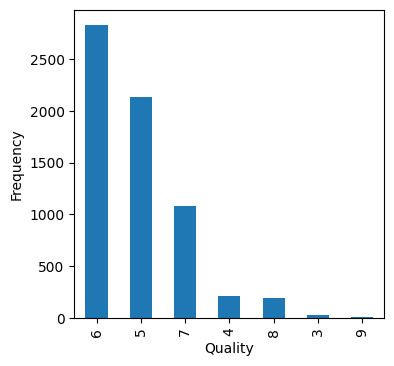

In [159]:
df= pd.read_csv('wine-full.csv')
print(df.head())
df.describe()
print("")

#Plot of the quality feature.
plt.figure(figsize=(4,4))
df_quality=df['quality']
df_quality.value_counts().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Frequency')

#Task 2

To find which wine the red or white is generally of higher quality, we need to plot the quality of the majority of samples for both classes. Of course we can also calculate the mean  and the median of each type. Below commands depicts that both types have the same median, but the white has by 0.2 larger mean. Once more, due to the imbalanced dataset, we have only 1599 candidates as red wine and 4898 as white wine. Eventually, i believe to determine in general the quality of the both classes, it would be wise to have exactly the same samples of the two types.

In [160]:
print(df.groupby('type')['quality'].mean())
print(df.groupby('type')['quality'].median())
df.groupby('type')['quality'].describe()


type
red      5.636023
white    5.877909
Name: quality, dtype: float64
type
red      6.0
white    6.0
Name: quality, dtype: float64


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


#Task 3
To respond this task we will use the **residual sugar** for both classes. First, we will identify wines with higher consistency in residual sugar(the sweetest wines) and those with the lowest residual sugar(the driest wines). Afterwards, we will compare the quality scores of the wines with larger residual sugar to the ones with smallest residual sugar.This will allow us to determine whether sweeter wines exhibit higher quality than dry wines.

 Based on below describe, the red wine is dryer than the red wine. The mean of red wine is around 2.5, while the white wine is 6.4

In [161]:
df.groupby('type')['residual sugar'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,2.538806,1.409928,0.9,1.9,2.2,2.6,15.5
white,4896.0,6.393250,5.072275,0.6,1.7,5.2,9.9,65.8


# Task 4

Create numpy arrays

In addition modify the [white,red] categorical data to numerical with 0 & 1.

In [162]:
#Numpy arrays
df['type'] = df['type'].map({'white': 0, 'red': 1})
X = df.drop(columns=['quality']).values
y = df['quality'].values

#Split to 90-10
seed=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

#Task 5
Import the libraries, train the DecisionTreeRegressor and print the Mean Absolute Error for test set.

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
seed=0
model = DecisionTreeRegressor(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (test): {mae:.2f}")


MAE (test): 0.45


#Task 6
Repeat the previous task with 10 different seeds, and collect the mae after each iteration.
This method to repeat the training and evaluation in 10 different seeds, provide 10 distinct train/test sets, which the model is trained. The only way to utilize these metrics is to **measure the average**, for instance in our case, Sum(all_mae)/number_of_different_seed.

In [164]:
mae_list = []

for seed in range(10):

    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.10, random_state=seed)

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(X_train_s, y_train_s)

    y_pred_s = model.predict(X_test_s)
    mae_s = mean_absolute_error(y_test_s, y_pred_s)

    mae_list.append(mae_s)

print("MAE list:", mae_list)
print("Mean MAE:", np.mean(mae_list))
print("Std MAE:", np.std(mae_list))

MAE list: [0.44769230769230767, 0.4707692307692308, 0.4230769230769231, 0.48307692307692307, 0.5015384615384615, 0.4492307692307692, 0.47384615384615386, 0.4430769230769231, 0.4338461538461538, 0.49538461538461537]
Mean MAE: 0.4621538461538462
Std MAE: 0.025243899022730665


#Task 7
So from task 4 we did split the dataset to 90-10. Now lets create, also the validation set which will be 20 percent. We will remove data from X_train_s to X_val. The test set will remain as it is.

In [165]:
# Second split
seed=0
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train, y_train, test_size=0.20, random_state=seed)
print("Train:", X_train_final.shape)
print("Validation:", X_val_final.shape)
print("Test:", X_test.shape)


Train: (4677, 12)
Validation: (1170, 12)
Test: (650, 12)


# Hyperparameter tuning
For hyperparameter tuning, we need the validation set in order to see the perfomance in this test. Compare the perfomances in both training and validation set.

In [173]:
# Lets define different max depth & min depth for the Decision Tree
max_depth= [2,4,6,8,10]
min_depth=[2,4,6]

#Initialize the results list
results=[]

#Keep the same seed for each tuning iteration
seed=0

# Nested loop to cover all the possible combinations
for depth in max_depth:
  for min in min_depth:
    #Call and fit the model
    model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min, random_state=seed)
    model.fit(X_train_final, y_train_final)
    #Make predictions
    y_pred_train = model.predict(X_train_final)
    y_pred_val = model.predict(X_val_final)

    #MAE metric
    mae_train = mean_absolute_error(y_train_final, y_pred_train)
    mae_val = mean_absolute_error(y_val_final, y_pred_val)

    #Store results
    results.append((depth, min, mae_train, mae_val))
print("\n Hyperparameter Tuning Results ")

print("max_depth | min_samples_split | MAE_train | MAE_val")
#Print results
for depth, split, tr, vl in results:
    print(f"{depth:9d} | {split:17d} | {tr:.4f}   | {vl:.4f}")





 Hyperparameter Tuning Results 
max_depth | min_samples_split | MAE_train | MAE_val
        2 |                 2 | 0.6039   | 0.5964
        2 |                 4 | 0.6039   | 0.5964
        2 |                 6 | 0.6039   | 0.5964
        4 |                 2 | 0.5661   | 0.5734
        4 |                 4 | 0.5691   | 0.5731
        4 |                 6 | 0.5691   | 0.5731
        6 |                 2 | 0.5232   | 0.5673
        6 |                 4 | 0.5240   | 0.5693
        6 |                 6 | 0.5253   | 0.5635
        8 |                 2 | 0.4527   | 0.5482
        8 |                 4 | 0.4631   | 0.5540
        8 |                 6 | 0.4691   | 0.5495
       10 |                 2 | 0.3601   | 0.5584
       10 |                 4 | 0.3897   | 0.5493
       10 |                 6 | 0.4122   | 0.5483


#Task 8

The validation set results can be used for the evaluation of hyperparameter tuning. Especially, the training performance/results utilizing for the training procedure. The validation set is not used for training, so the significance of its metric is very close to be realistic and to determine the best tuning parameters.

#Task 9 Cross-Validation

For scoring we have to select the negative mae, becasue GridSearchCV maximizes the scoring function, and MAE must ne minimized. So sklearn use the negative MAE in order to achive this.

In [167]:
from sklearn.model_selection import GridSearchCV

# Again the same grid parameters
param_grid = {'max_depth': [2, 4, 6, 8, 10],'min_samples_split': [2, 4, 6]}

seed=0
model1= DecisionTreeRegressor(random_state=seed)
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Print results
print("Best parameters:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)



Best parameters: {'max_depth': 10, 'min_samples_split': 2}
Best CV MAE: 0.5442399782607377


# Task 10
Most robust method to evaluate the model :

  6) -> Multiple random train-test splits(10 seeds):
      This method is sensitive to random, and also is not acceptable in the production. If the inputs have noise, maybe there will be specific samples, with specific seeds, that will destroy the performance of our model.

  7) -> Fixed train-validation split (80/20 inside training set)
      This method has a fixed validation split(validation set), and using this set measure the performance of the model.

  8) -> GridSearchCV with 10-fold cross-validation
      This approach is the most robust. Because the validation set is split to different samples. Moreover this method evaluates every hyperparameter combination 10 times.

      So the GridSearchCV with 10-fold cross-validation is more robust and appropriate.

In [168]:
# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Final Test MAE:", mae_test)

Final Test MAE: 0.5213017469476506


# Task 11


In [169]:
# Define max_depth=5, take the same min_samples as before.
param_grid = {'min_samples_split': [2, 4, 6, 8, 10]}
model_task11 = DecisionTreeRegressor(max_depth=5, random_state=0)
grid_search = GridSearchCV(estimator=model_task11, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)


Best parameters: {'min_samples_split': 2}
Best CV MAE: 0.5668091119767175


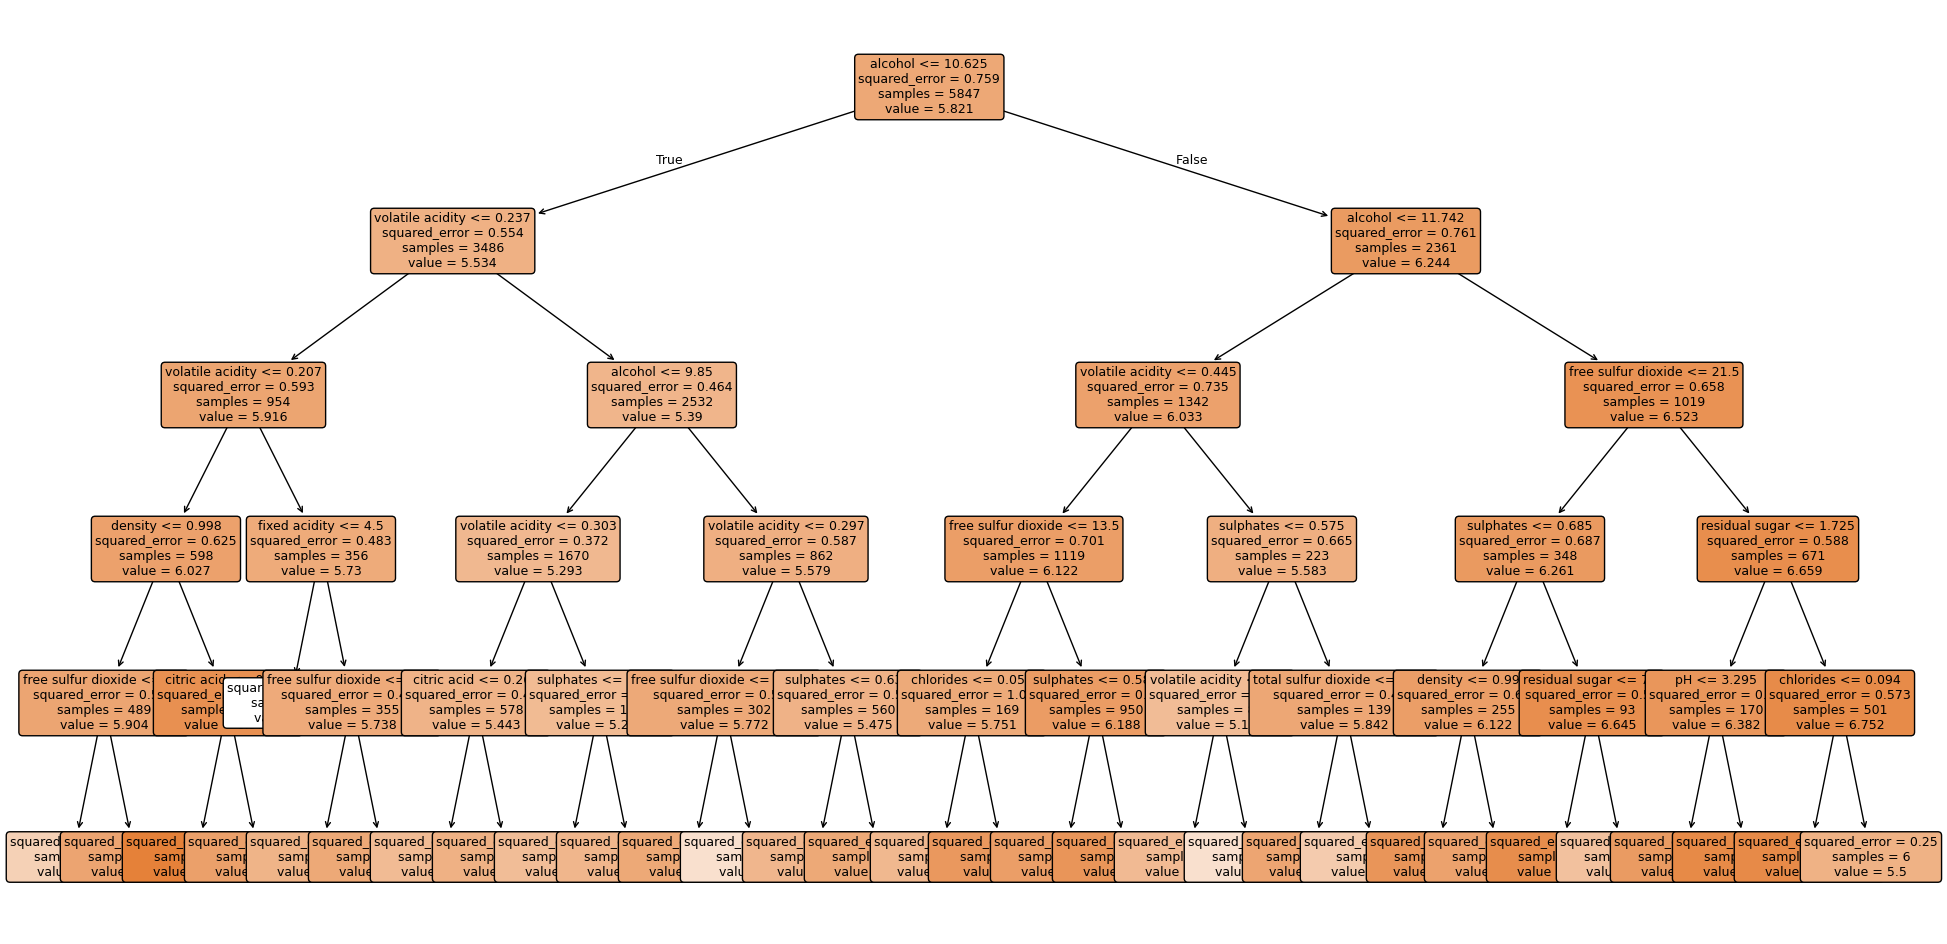

In [170]:
# Call the best tree based on previous cell
best_tree = grid_search.best_estimator_
#Plot the Decision Tree
plt.figure(figsize=(24, 12))
plot_tree(best_tree,feature_names=df.drop(columns=['quality']).columns,filled=True,rounded=True,fontsize=9)
plt.show()

# Analyze the human-readible Decision Tree rules.


In [171]:
#Export the rules using a specific library
from sklearn.tree import export_text
tree_rules = export_text(best_tree, feature_names=df.drop(columns=['quality']).columns.tolist())
print(tree_rules)

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.44]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |   |   |--- valu

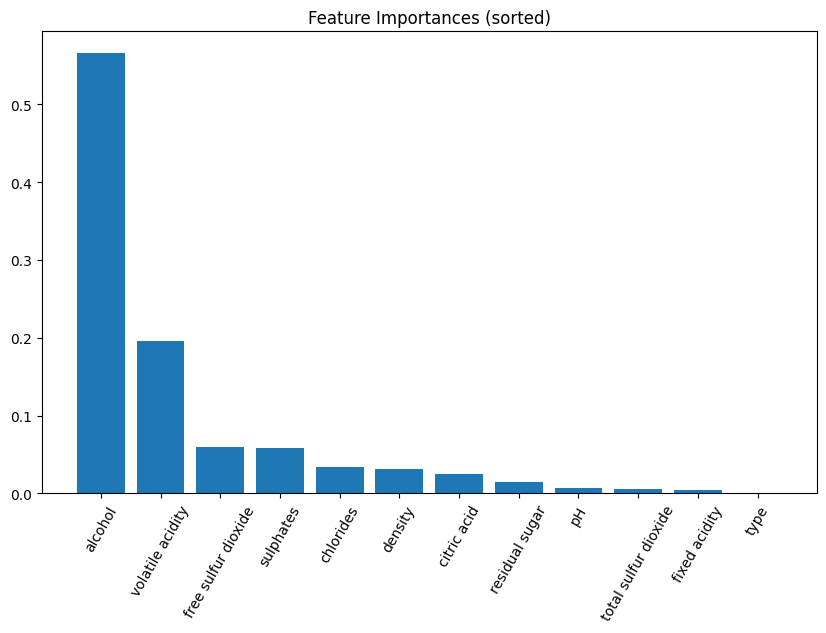

In [172]:
#Feature Importance Bar Plot
feature_names = df.drop(columns=['quality']).columns
importances = best_tree.feature_importances_

#Classify the features based on their importances
sorted_idx = np.argsort(importances)[::-1]

#Create the plot
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=60)
plt.title("Feature Importances (sorted)")
plt.show()